# **Kütüphaneleri İçe Aktarma**

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc

In [ ]:
# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# SHAP kurulumu
!pip install shap

In [ ]:
# Veri setinin okunması
df = pd.read_csv('Hotel Reservations.csv')

# **Exploratory Data Analysis**

In [ ]:
# Veri seti hakkında genel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Sayısal sütunların istatistiksel özeti
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# Veri setinin boyutları
df.shape

(36275, 19)

In [ ]:
# İlk 5 satırın kontrol edilmesi
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Son 5 satırın kontrol edilmesi
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
# Eksik değer kontrolü
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
# Tüm featurelar
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# Featureların kaç farklı değer içerdiği kontrolü
df.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


In [ ]:
# Tekrar eden satırların (duplicate) kontrolü
duplic = df.duplicated().sum()
print(f"Tekrar eden kayıt sayısı: {duplic}")

Tekrar eden kayıt sayısı: 0


In [ ]:
# Mantıksal hata kontrolü: Hem yetişkin hem çocuk sayısının 0 olduğu kayıtlar mantıksızdır
filtre = (df['no_of_adults'] == 0) & (df['no_of_children'] == 0)
print(f"Hatalı kayıt sayısı: {len(df[filtre])}")

Hatalı kayıt sayısı: 0


In [ ]:
# Hedef değişkenin (Booking Status) dağılım oranları
df['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.672364
Canceled,0.327636


In [ ]:
# Kategorikal veriler
cat_columns = df.select_dtypes(include='object').columns.tolist()
print(cat_columns)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [ ]:
# Nümerik veriler
num_columns = df.select_dtypes(include='number').columns.tolist()
print(num_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


# **Veri Görselleştirme**

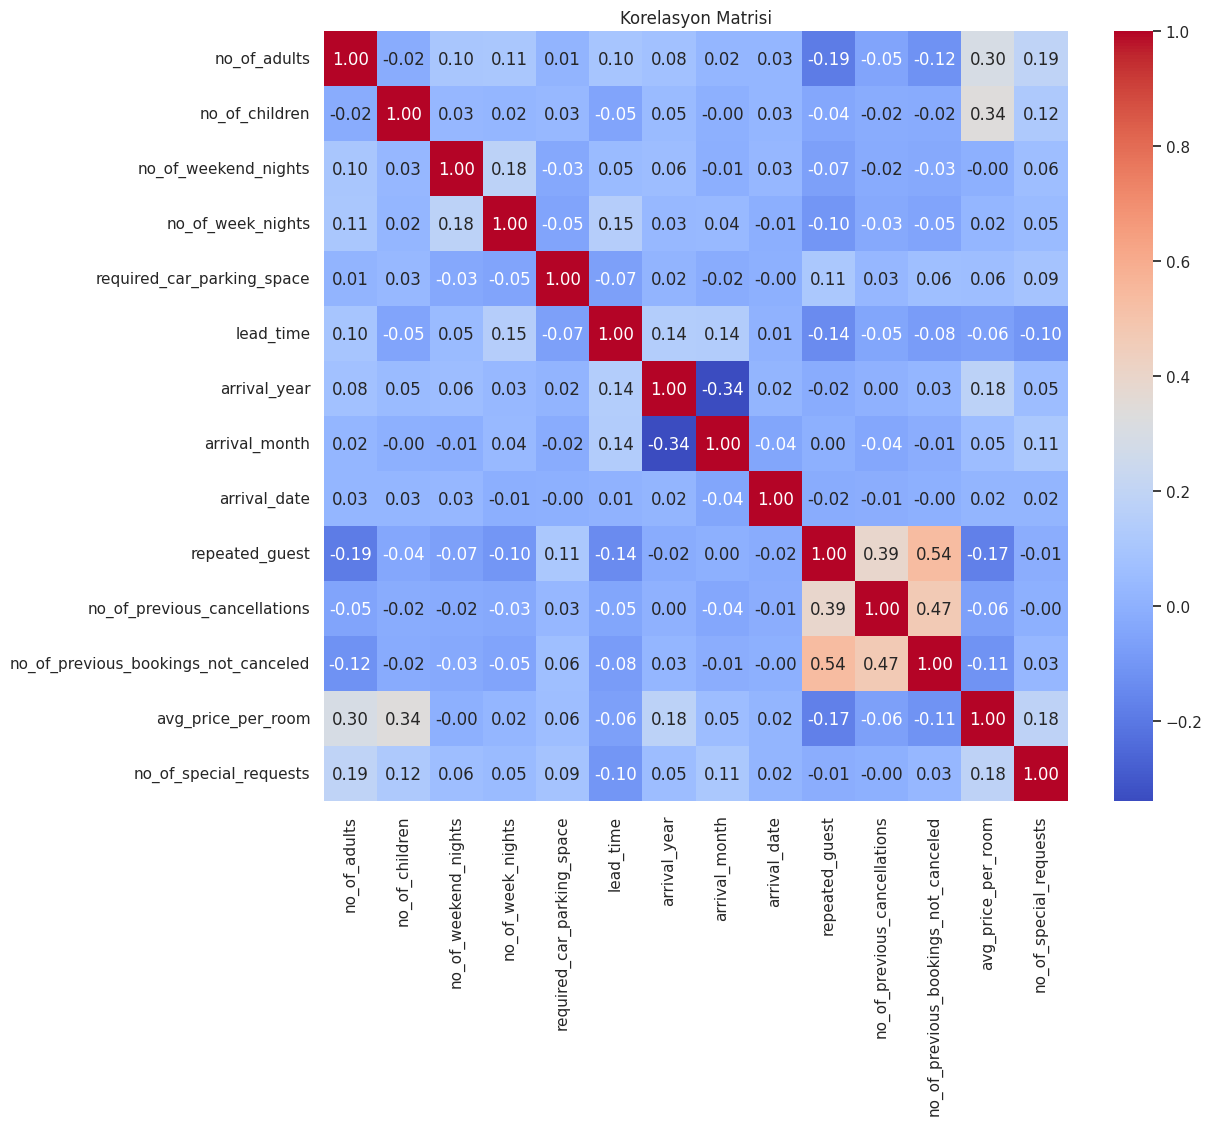

In [ ]:
# Sayısal değişkenler arasındaki korelasyon haritası
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

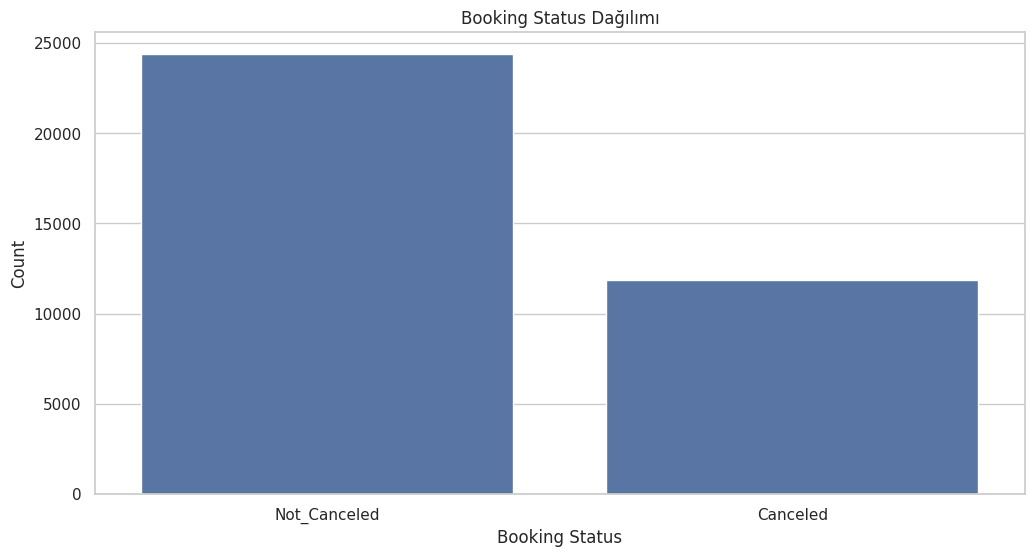

In [ ]:
# Rezervasyon iptal durumunun (Target) görselleştirilmesi
sns.countplot(data=df, x='booking_status')
plt.title("Booking Status Dağılımı")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

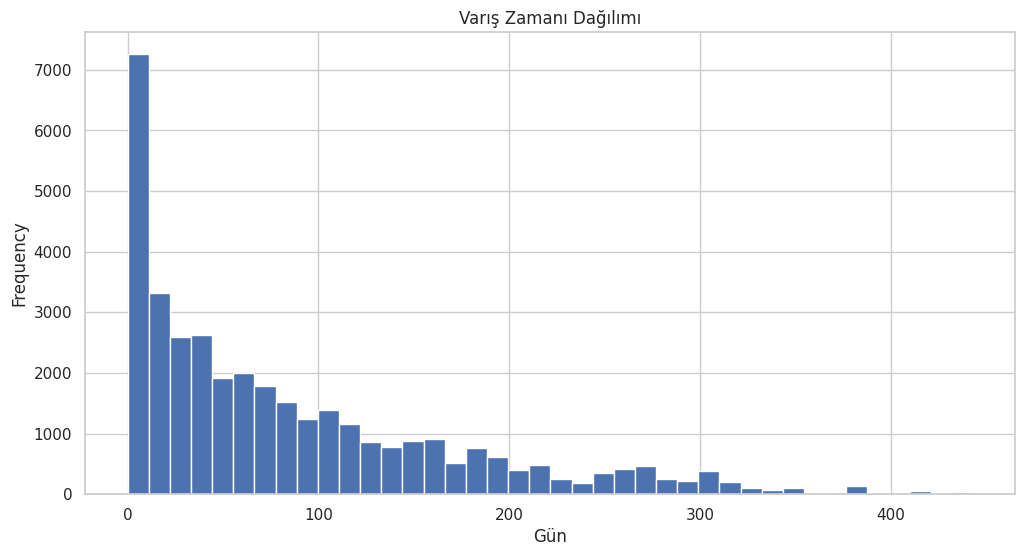

In [ ]:
# Rezervasyonun yapıldığı tarih ile otele giriş tarihi arasında geçen gün sayısı
df['lead_time'].plot(kind='hist', bins=40)
plt.title("Varış Zamanı Dağılımı")
plt.xlabel("Gün")
plt.show()

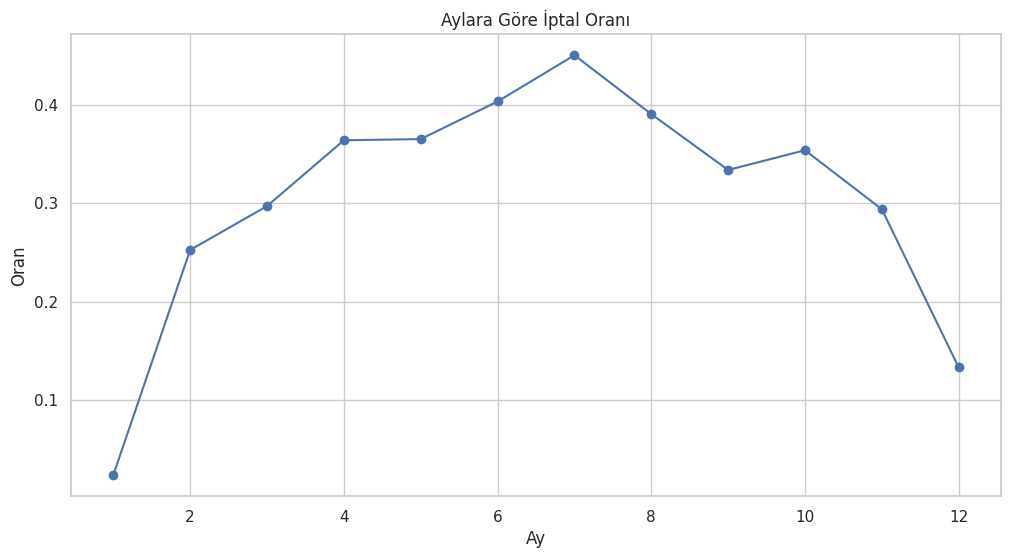

In [ ]:
# Aylara göre iptal oranı
monthly_cancel = (df.assign(is_cancel=(df['booking_status']=='Canceled').astype(int))
                    .groupby('arrival_month')['is_cancel'].mean())
monthly_cancel.plot(kind='line', marker='o')
plt.title("Aylara Göre İptal Oranı")
plt.xlabel("Ay")
plt.ylabel("Oran")
plt.show()

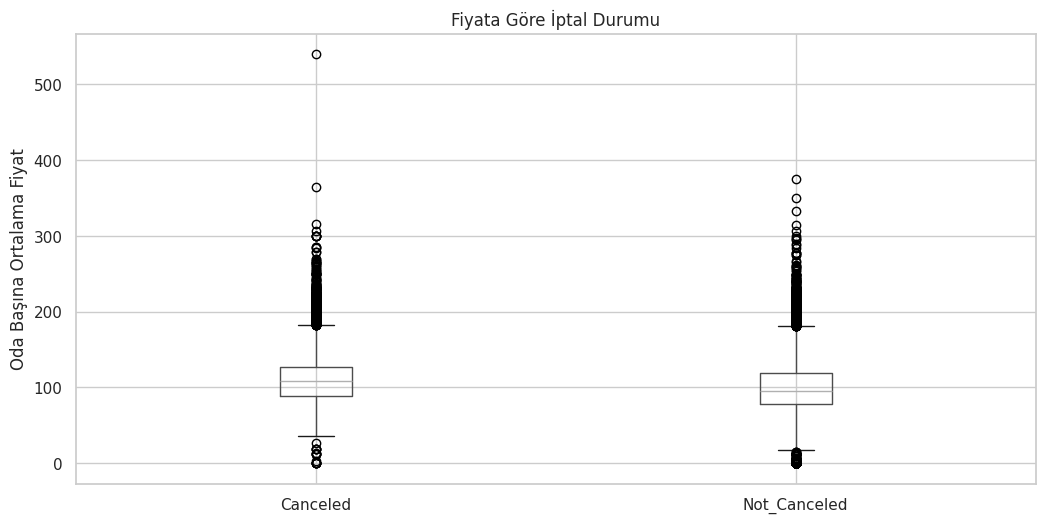

In [ ]:
# Fiyata göre iptal oranı
df.boxplot(column='avg_price_per_room', by='booking_status')
plt.suptitle("")
plt.title("Fiyata Göre İptal Durumu")
plt.xlabel("")
plt.ylabel("Oda Başına Ortalama Fiyat")
plt.show()

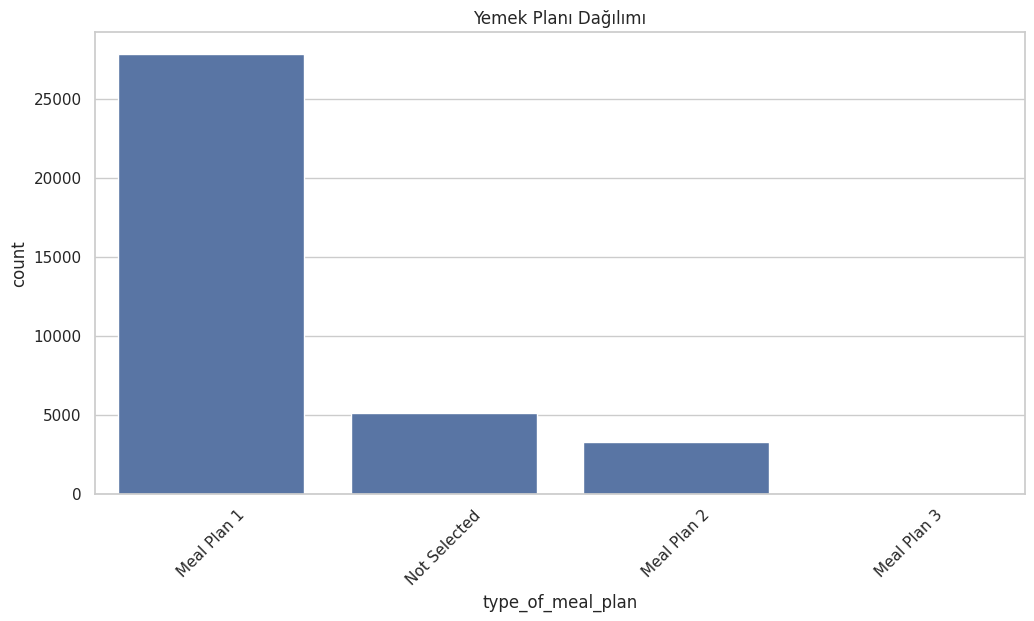

In [ ]:
# Yemek planı dağılımı
sns.countplot(data=df, x='type_of_meal_plan')
plt.title("Yemek Planı Dağılımı")
plt.xticks(rotation=45)
plt.show()

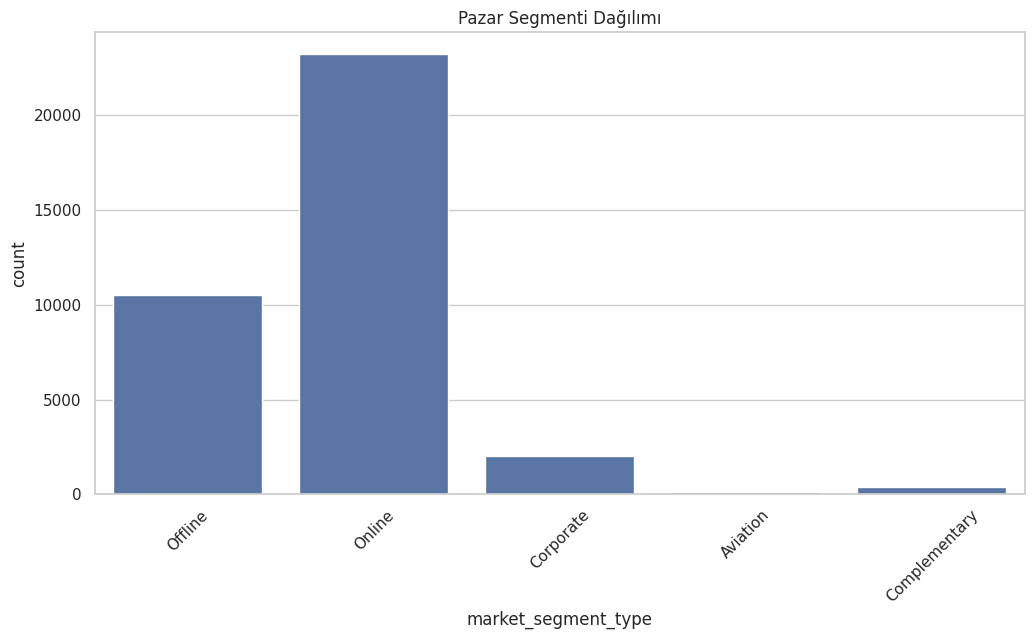

In [ ]:
# Pazar segmenti dağılımı
sns.countplot(data=df, x='market_segment_type')
plt.xticks(rotation=45)
plt.title("Pazar Segmenti Dağılımı")
plt.show()

# **Aykırı Değer Analizi**

Text(0.5, 1.0, 'Oda Fiyatı Aykırı Değerleri')

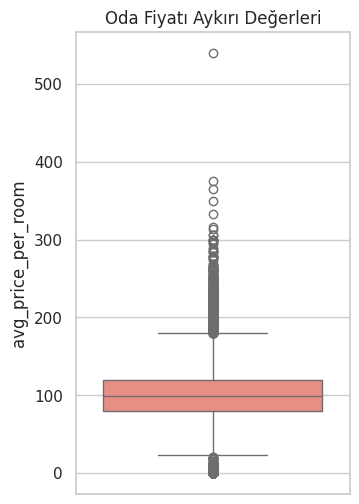

In [ ]:
# Oda fiyatları outlier
plt.subplot(1, 3, 1)
sns.boxplot(y=df['avg_price_per_room'], color='salmon')
plt.title('Oda Fiyatı Aykırı Değerleri')

Text(0.5, 1.0, 'Bekleme Süresi (Lead Time) Aykırı Değerleri')

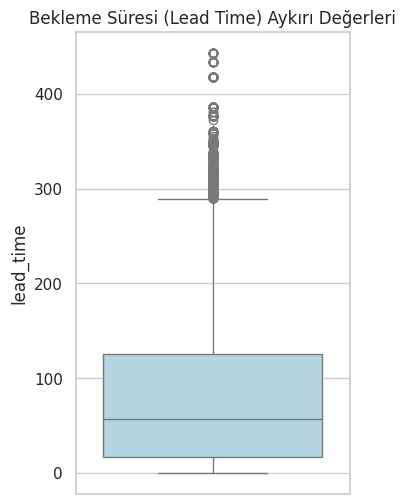

In [ ]:
# Bekleme süresi outlier
plt.subplot(1, 3, 2)
sns.boxplot(y=df['lead_time'], color='lightblue')
plt.title('Bekleme Süresi (Lead Time) Aykırı Değerleri')

Text(0.5, 1.0, 'Çocuk Sayısı Aykırı Değerleri')

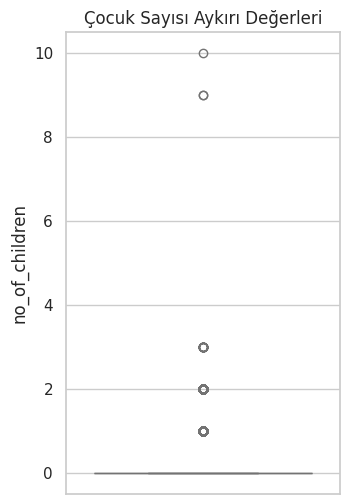

In [ ]:
# Çocuk sayısı outlier
plt.subplot(1, 3, 3)
sns.boxplot(y=df['no_of_children'], color='lightgreen')
plt.title('Çocuk Sayısı Aykırı Değerleri')

# **Feature Engineering**

In [ ]:
# Fiyatı 0 olan kayıtların temizlenmesi
zero_price = df[df['avg_price_per_room'] == 0]
print("Number of rows with a price of 0:", len(zero_price))
df = df[df['avg_price_per_room'] > 0]

Number of rows with a price of 0: 545


In [ ]:
# Model için gereksiz olan ID sütununun düşürülmesi
df = df.drop('Booking_ID', axis=1)

In [ ]:
# Toplam gece sayısı ve toplam kişi sayısı gibi yeni sütunlar ekleniyor
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']
df['total_people'] = df['no_of_adults'] + df['no_of_children']

# **Train-Test Split**

In [ ]:
# Hedef değişken ve bağımsız değişken
X = df.drop('booking_status', axis=1)
y = df['booking_status']
# Hedef değişkenin sayısal değere dönüştürülmesi
le = LabelEncoder()
y = le.fit_transform(y)
# Verinin %80 eğitim, %20 test olarak ayrılması(target dengesiz olduğu stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

# **Cross-Validation ile Modelleri Değerlendirmek İçin Fonksiyon**

In [ ]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name='Model Name'):

    # Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {'roc_auc': 'roc_auc', 'f1': 'f1_weighted', 'recall': 'recall_weighted', 'precision': 'precision_weighted'}
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

    # Test Set Evaluation
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 14}, linewidths=0.5)
    plt.title(f'{model_name} - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    plt.show()

    return {
        'Model': model_name,

        # Test Seti Skorları (Tek seferlik test)
        'Test F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_pred, average='weighted'),
        'Test ROC-AUC': roc_auc_score(y_test, y_prob),

        # Cross Validation Skorları (Ortalama Performans)
        'CV Mean F1': cv_results['test_f1'].mean(),
        'CV Mean Recall': cv_results['test_recall'].mean(),
        'CV Mean Precision': cv_results['test_precision'].mean(),
        'CV Mean ROC-AUC': cv_results['test_roc_auc'].mean()
    }

# **Preprocessor**

In [ ]:
# Eğitim setindeki kategorik ve sayısal sütunların belirlenmesi
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [ ]:
# Sayısal veriler için Standartlaştırma (StandardScaler)
# Kategorik veriler için One-Hot Encoding (OneHotEncoder) işlemi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# **Logistic Regression Tüm Senaryolar**

### **1. Sadece Preprocessing**

In [ ]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced'))
])

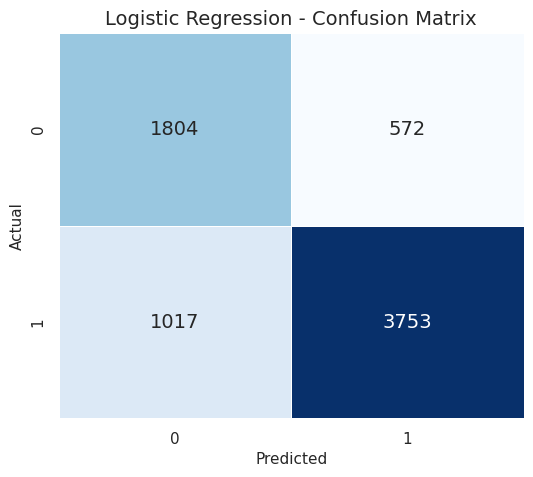

In [ ]:
results_lr = evaluate_model(
    pipeline_lr,
    X_train, y_train,
    X_test, y_test,
    model_name='Logistic Regression'
)

In [ ]:
metrics_lr = pd.DataFrame([results_lr])
print(metrics_lr)

                 Model  Test F1 Score  Test Recall  Test Precision  \
0  Logistic Regression       0.781718     0.777638        0.791852   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0      0.857993    0.782818        0.778722            0.79331   

   CV Mean ROC-AUC  
0         0.861323  


### **2. Preprocessing + Dimension Reduction(PCA)**

In [ ]:
pipeline_lr_pca = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('classifier', LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced'))
])

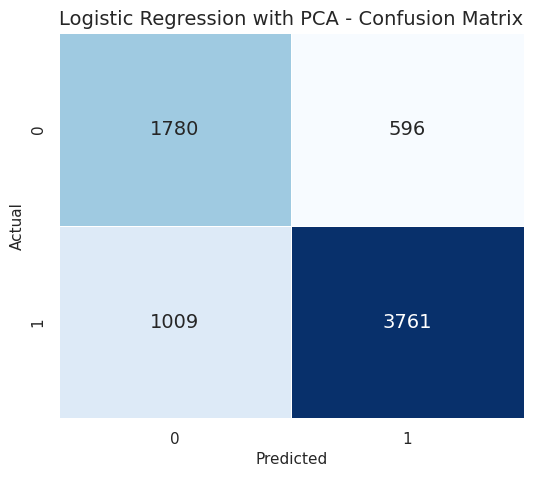

In [ ]:
results_lr_pca = evaluate_model(
    pipeline_lr_pca,
    X_train, y_train,
    X_test, y_test,
    model_name='Logistic Regression with PCA'
)

In [ ]:
metrics_lr_pca = pd.DataFrame([results_lr_pca])
print(metrics_lr_pca)

                          Model  Test F1 Score  Test Recall  Test Precision  \
0  Logistic Regression with PCA       0.779297     0.775399        0.788402   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0      0.849237    0.778538        0.774209           0.789934   

   CV Mean ROC-AUC  
0         0.851247  


### **3. Preprocessing + Feature Selection(KBest)**

In [ ]:
pipe_lr_fs = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=15)),
    ('classifier', LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced'))
])

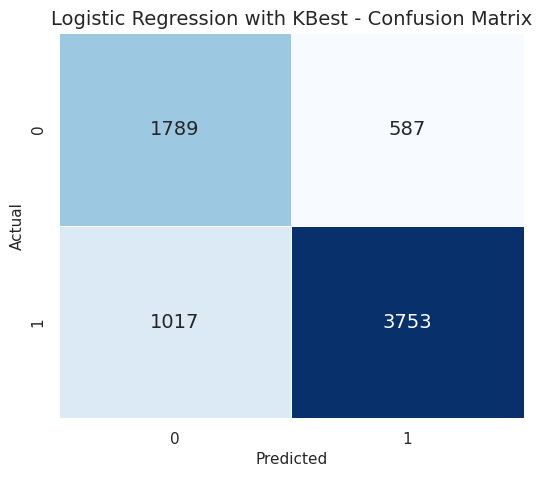

In [ ]:
results_lr_fs = evaluate_model(
    pipe_lr_fs,
    X_train, y_train,
    X_test, y_test,
    model_name='Logistic Regression with KBest'
)

In [ ]:
metrics_lr_fs = pd.DataFrame([results_lr_fs])
print(metrics_lr_fs)

                            Model  Test F1 Score  Test Recall  Test Precision  \
0  Logistic Regression with KBest       0.779554     0.775539        0.789209   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0       0.85565    0.782306        0.778233           0.792614   

   CV Mean ROC-AUC  
0         0.859577  


### **4. Preprocessing + Feature Selection(KBest) + Dimension Reduction (PCA)**

In [ ]:
pipe_both = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=15)),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('classifier', LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced'))
])

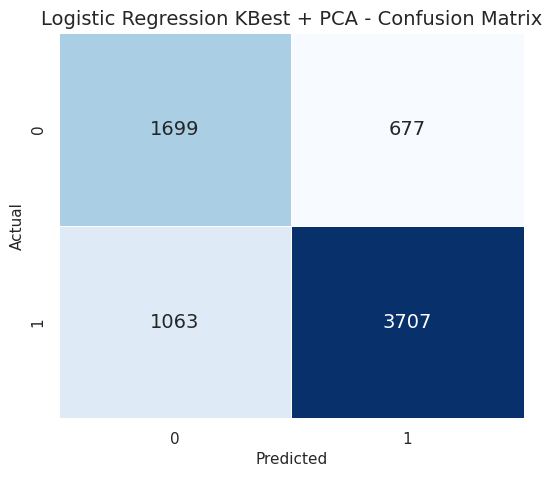

In [ ]:
results_lr_both = evaluate_model(
    pipe_both,
    X_train, y_train,
    X_test, y_test,
    model_name='Logistic Regression KBest + PCA'
)

In [ ]:
metrics_both = pd.DataFrame([results_lr_both])
print(metrics_both)

                             Model  Test F1 Score  Test Recall  \
0  Logistic Regression KBest + PCA        0.76052     0.756507   

   Test Precision  Test ROC-AUC  CV Mean F1  CV Mean Recall  \
0        0.768955      0.823054    0.755795          0.7507   

   CV Mean Precision  CV Mean ROC-AUC  
0           0.768997         0.828825  


# **Decision Tree Tüm Senaryolar**

### **1. Sadece Preprocessing**

In [ ]:
pipeline_tree = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(max_depth=10,
                                              min_samples_split=20,
                                              min_samples_leaf=10,
                                              max_leaf_nodes=50,
                                              class_weight='balanced',
                                              random_state=42))
    ])

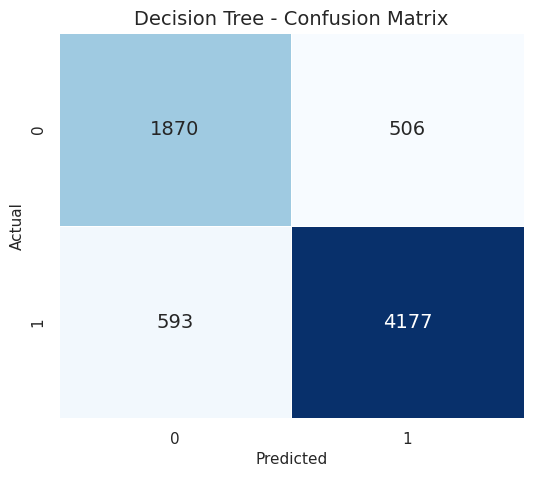

In [ ]:
results_tree = evaluate_model(
    pipeline_tree,
    X_train, y_train,
    X_test, y_test,
    model_name='Decision Tree'
)

In [ ]:
metrics_tree = pd.DataFrame([results_tree])
print(metrics_tree)

           Model  Test F1 Score  Test Recall  Test Precision  Test ROC-AUC  \
0  Decision Tree       0.846882     0.846208        0.847823      0.907004   

   CV Mean F1  CV Mean Recall  CV Mean Precision  CV Mean ROC-AUC  
0    0.846881        0.846138           0.848097         0.907261  


### **2. Preprocessing + Dimension Reduction(PCA)**

In [ ]:
pipeline_tree_pca = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('classifier', DecisionTreeClassifier(max_depth=10,
                                              min_samples_split=20,
                                              min_samples_leaf=10,
                                              max_leaf_nodes=50,
                                              class_weight='balanced',
                                              random_state=42))
    ])

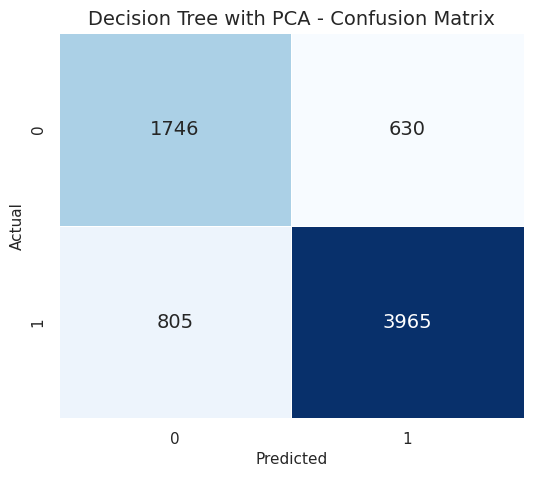

In [ ]:
results_tree_pca = evaluate_model(
    pipeline_tree_pca,
    X_train, y_train,
    X_test, y_test,
    model_name='Decision Tree with PCA'
)

In [ ]:
metrics_tree_pca = pd.DataFrame([results_tree_pca])
print(metrics_tree_pca)

                    Model  Test F1 Score  Test Recall  Test Precision  \
0  Decision Tree with PCA       0.800878     0.799188        0.803559   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0      0.851272    0.783719        0.779143           0.797206   

   CV Mean ROC-AUC  
0         0.848203  


### **3. Preprocessing + Feature Selection(KBest)**

In [ ]:
pipeline_tree_fs = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(score_func=f_classif, k=15)),
        ('classifier', DecisionTreeClassifier(max_depth=10,
                                              min_samples_split=20,
                                              min_samples_leaf=10,
                                              max_leaf_nodes=50,
                                              class_weight='balanced',
                                              random_state=42))
    ])

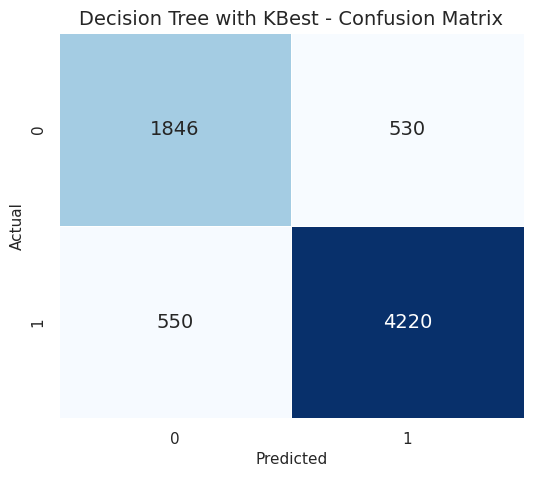

In [ ]:
results_tree_fs = evaluate_model(
    pipeline_tree_fs,
    X_train, y_train,
    X_test, y_test,
    model_name='Decision Tree with KBest'
)

In [ ]:
metrics_tree_fs = pd.DataFrame([results_tree_fs])
print(metrics_tree_fs)

                      Model  Test F1 Score  Test Recall  Test Precision  \
0  Decision Tree with KBest       0.849024     0.848866        0.849197   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0       0.90334    0.846644        0.846348           0.847202   

   CV Mean ROC-AUC  
0          0.90348  


### **4. Preprocessing + Feature Selection(KBest) + Dimension Reduction (PCA)**

In [ ]:
pipeline_tree_both = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(score_func=f_classif, k=15)),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('classifier', DecisionTreeClassifier(max_depth=10,
                                              min_samples_split=20,
                                              min_samples_leaf=10,
                                              max_leaf_nodes=50,
                                              class_weight='balanced',
                                              random_state=42))
    ])

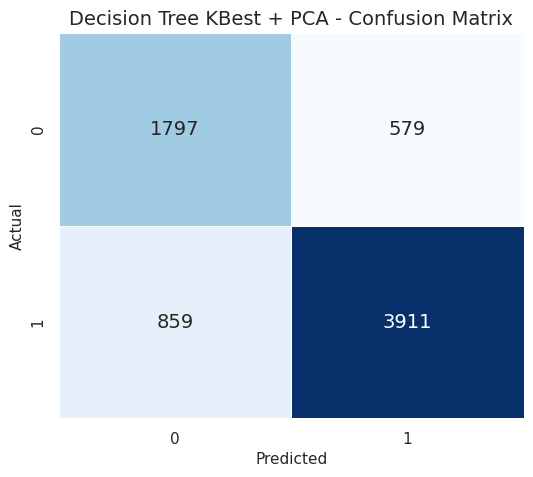

In [ ]:
results_tree_both = evaluate_model(
    pipeline_tree_both,
    X_train, y_train,
    X_test, y_test,
    model_name='Decision Tree KBest + PCA'
)

In [ ]:
metrics_tree_both = pd.DataFrame([results_tree_both])
print(metrics_tree_both)

                       Model  Test F1 Score  Test Recall  Test Precision  \
0  Decision Tree KBest + PCA       0.801325     0.798769        0.806388   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0       0.85451    0.796926         0.79422            0.80274   

   CV Mean ROC-AUC  
0         0.851549  


# **Sonuçlar Tablo Halinde**

In [ ]:
# Tüm sonuçları bir topla
all_results = pd.DataFrame([
    results_lr,
    results_lr_pca,
    results_lr_fs,
    results_lr_both,
    results_tree,
    results_tree_pca,
    results_tree_fs,
    results_tree_both
])

# ROC-AUC değerine göre sıralama
comparison_df = all_results.sort_values(by='Test ROC-AUC', ascending=False).reset_index(drop=True)

# Görselleştirme
comparison_df.style.background_gradient(
    cmap='YlOrRd',
    subset=[
        'Test F1 Score', 'Test Recall', 'Test Precision', 'Test ROC-AUC',
        'CV Mean F1', 'CV Mean Recall', 'CV Mean Precision', 'CV Mean ROC-AUC'
    ]
).format("{:.4f}", subset=[
        'Test F1 Score', 'Test Recall', 'Test Precision', 'Test ROC-AUC',
        'CV Mean F1', 'CV Mean Recall', 'CV Mean Precision', 'CV Mean ROC-AUC'
])

,Model,Test F1 Score,Test Recall,Test Precision,Test ROC-AUC,CV Mean F1,CV Mean Recall,CV Mean Precision,CV Mean ROC-AUC
0,Decision Tree,0.8469,0.8462,0.8478,0.9070,0.8469,0.8461,0.8481,0.9073
1,Decision Tree with KBest,0.8490,0.8489,0.8492,0.9033,0.8466,0.8463,0.8472,0.9035
2,Logistic Regression,0.7817,0.7776,0.7919,0.8580,0.7828,0.7787,0.7933,0.8613
3,Logistic Regression with KBest,0.7796,0.7755,0.7892,0.8557,0.7823,0.7782,0.7926,0.8596
4,Decision Tree KBest + PCA,0.8013,0.7988,0.8064,0.8545,0.7969,0.7942,0.8027,0.8515
5,Decision Tree with PCA,0.8009,0.7992,0.8036,0.8513,0.7837,0.7791,0.7972,0.8482
6,Logistic Regression with PCA,0.7793,0.7754,0.7884,0.8492,0.7785,0.7742,0.7899,0.8512
7,Logistic Regression KBest + PCA,0.7605,0.7565,0.7690,0.8231,0.7558,0.7507,0.7690,0.8288


# **ROC/PR eğrileri**

In [ ]:
def plot_roc_pr_curves(pipeline, X_test, y_test, model_name):
    # Olasılık tahminlerini al
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # ROC Curve Verileri
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # PR Curve Verileri
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Çizim
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    # ROC Plot
    ax[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'{model_name} - ROC Curve')
    ax[0].legend(loc="lower right")

    # PR Plot
    ax[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title(f'{model_name} - Precision-Recall Curve')
    ax[1].legend(loc="lower left")

    plt.show()

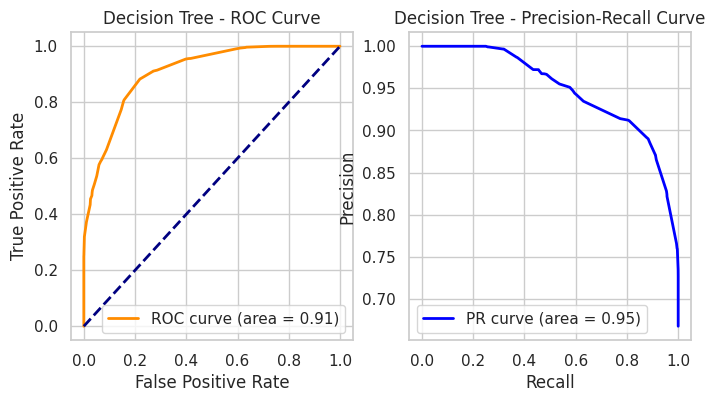

In [ ]:
# Decision Tree ROC/PR eğrisi
plot_roc_pr_curves(pipeline_tree, X_test, y_test, "Decision Tree")

# **SHAP Analizi**

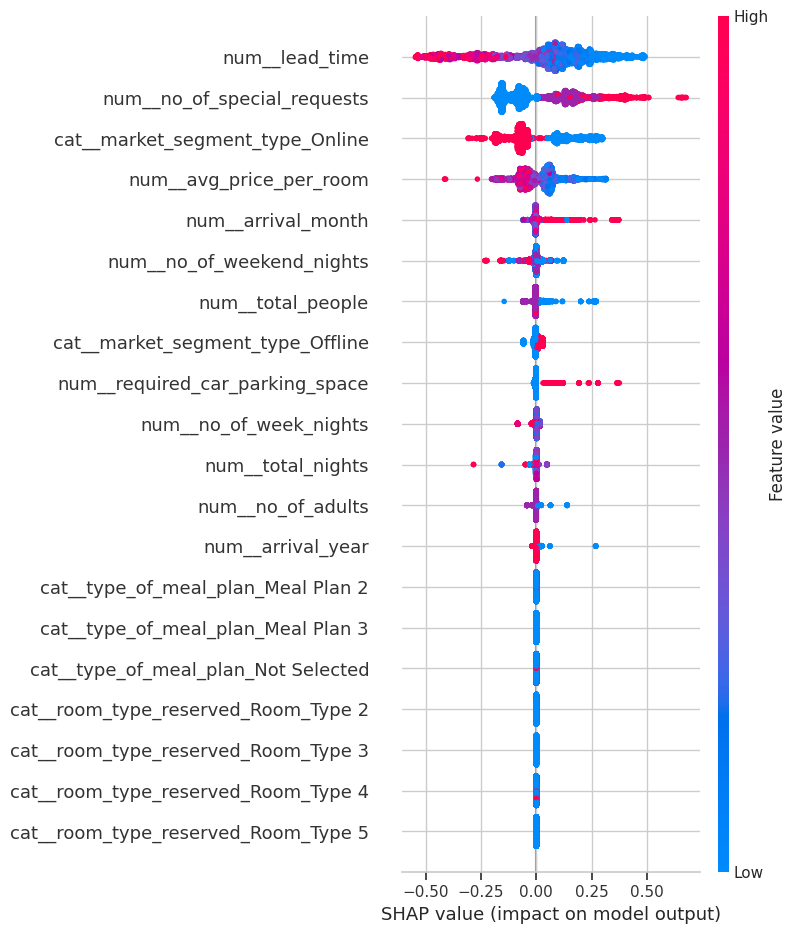

In [ ]:
import shap

# 1. SHAP Değerlerini Hesapla
# Veriyi dönüştür (Pipeline içine giremediğimiz için manuel transform yapıyoruz)
X_test_transformed = pipeline_tree.named_steps['preprocessor'].transform(X_test)

# Sparse matrix ise dense formata çevir
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

# Özellik isimlerini al
feature_names = pipeline_tree.named_steps['preprocessor'].get_feature_names_out()

# Explainer oluştur
explainer = shap.TreeExplainer(pipeline_tree.named_steps['classifier'])
shap_values = explainer.shap_values(X_test_transformed)

# 2. SHAP Değerlerinin Formatını Ayarlama
vals_to_plot = shap_values[:, :, 1]

# 3. SHAP Summary Plot Çizimi
plt.figure(figsize=(2, 1))
shap.summary_plot(vals_to_plot, X_test_transformed, feature_names=feature_names)
plt.show()

# **Kalibrasyon Eğrisi**

In [ ]:
def plot_calibration_curve(pipeline, X_test, y_test, model_name):
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

    plt.figure(figsize=(6, 3))
    plt.plot(prob_pred, prob_true, marker='o', label=model_name)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

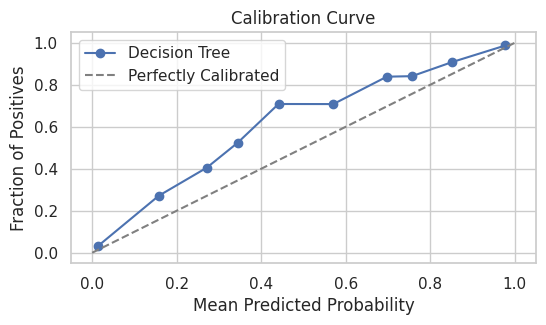

In [ ]:
# Decision Tree Kalibrasyon eğrisi
plot_calibration_curve(pipeline_tree, X_test, y_test, 'Decision Tree')

# **Hata Dökümleri**

In [ ]:
def error_analysis(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)

    # Test setini DataFrame'e çevirip hataları ekleyelim
    analysis_df = X_test.copy()
    analysis_df['Actual'] = y_test
    analysis_df['Predicted'] = y_pred

    # Sadece hatalı tahminleri filtrele
    errors = analysis_df[analysis_df['Actual'] != analysis_df['Predicted']]

    print(f"Toplam Hatalı Tahmin Sayısı: {len(errors)}")
    print("\nHatalı Tahminlerin 'lead_time' ortalaması:")
    print(errors['lead_time'].mean())

    print("\nHatalı Tahminlerdeki Pazar Segmenti Dağılımı:")
    print(errors['market_segment_type'].value_counts())

    return errors.head()

In [ ]:
# Decision Tree hata dökümü
error_samples = error_analysis(pipeline_tree, X_test, y_test)
error_samples

Toplam Hatalı Tahmin Sayısı: 1099

Hatalı Tahminlerin 'lead_time' ortalaması:
78.40673339399454

Hatalı Tahminlerdeki Pazar Segmenti Dağılımı:
market_segment_type
Online           826
Offline          220
Corporate         42
Aviation           9
Complementary      2
Name: count, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,total_people,Actual,Predicted
2867,2,0,0,1,Meal Plan 1,0,Room_Type 1,38,2018,9,...,Online,0,0,0,109.80,0,1,2,1,0
4962,2,0,2,2,Meal Plan 1,0,Room_Type 1,106,2017,12,...,Online,0,0,0,72.25,2,4,2,0,1
2653,2,0,3,7,Meal Plan 1,0,Room_Type 1,200,2018,7,...,Online,0,0,0,90.95,1,10,2,0,1
23949,1,0,2,0,Meal Plan 1,0,Room_Type 1,95,2018,11,...,Online,0,0,0,90.00,2,2,1,0,1
32044,2,0,1,1,Meal Plan 1,0,Room_Type 1,19,2018,7,...,Online,0,0,0,151.00,1,2,2,0,1
